# Лабораторная работа №6.


# Жадная стратегия и динамическое программирование.

# Задание №2.

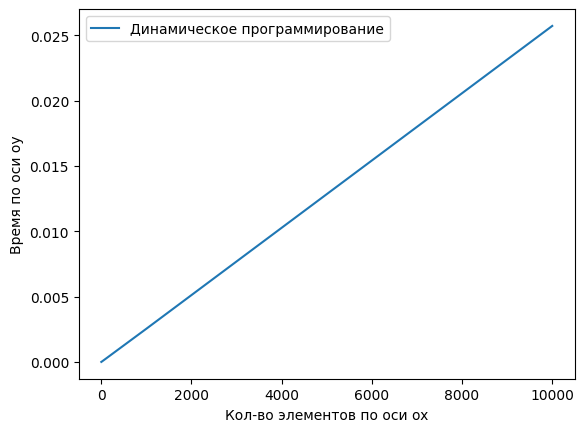

In [1]:
import sys
import random
import matplotlib.pyplot as plt
import timeit

items_ = {
    "Вода": (3, 5), # Вариант №1, данные с первого задания.
    "Книга": (1, 3),
    "Еда": (2, 6),
    "Куртка": (2, 5),
    "Камера": (1, 6),
}
items_list = list(items_.keys())
max_size = 5
w = [it[0] for it in items_.values()]
p = [it[1] for it in items_.values()]
dict = {}


def full_search(w, p, n, backpack, dict):
    if bag_size < 0:
        return -sys.maxsize
    if n < 0 or backpack == 0:
        return 0

    include = p[n] + search(w, p, n-1, backpack-w[n], dict)
    exclude = search(w, p, n-1, backpack, dict)
    return max(include, exclude)


def greedy_algorithm(w, p, backpack, items):
    items_list = list(items.keys())
    n = len(items)
    t = {}
    for i in range(n):
        t[w[i]/p[i]] = i

    keys = list(t.keys())
    keys.sort()

    w_ = 0
    p_ = 0
    ans = []
    for i in keys:
        if w_ + w[t[i]] <= backpack:
            w_ = w_ + w[t[i]]
            p_ = p_ + p[t[i]]
            ans.append(items_list[t[i]])
    return ans, p_


def dynamical_programming(w, p, backpack, items):
    items_list = list(items.keys())
    n = len(items)
    bag = [[0] * (backpack+1) for _ in range(n+1)]
    for i in range(1, n + 1):
        for k in range(1, backpack + 1):
            if k >= w[i-1]:
                bag[i][k] = max(bag[i-1][k], bag[i-1][k-w[i-1]] + p[i-1])
            else:
                bag[i][k] = bag[i-1][k]

    ans = []
    k = backpack
    p_ = 0
    for i in range(n, 0, -1):
        if bag[i][k] != bag[i-1][k]:
            ans.append(items_list[i-1])
            k -= w[i-1]
            p_ = p_ + p[i-1]
    return ans, p_


example_range = [1, 10, 100, 1000, 10000 ] # входные данные для тестирования
example_items = {}
max_size = 5
dict = {}
time = [[], [], []]
for i in example_range:
    for j in range(i):
        example_items[j] = (random.randint(1, max_size), random.randint(1, 10))
    w = [it[0] for it in example_items.values()]
    p = [it[1] for it in example_items.values()]
    # time[0].append(timeit.timeit(
    #     f"full_search({w}, {p}, {i-1}, {max_size}, {dict})", number=1, globals=globals()))
    #time[1].append(timeit.timeit(
    #   f"greedy_algorithm({w}, {p}, {max_size}, {example_items})", number=1, globals=globals()))
    time[2].append(timeit.timeit(
         f"dynamical_programming({w}, {p}, {max_size}, {example_items})", number=1, globals=globals()))

#plt.plot(example_range, time[0], label="Полный перебор")
#plt.plot(example_range, time[1], label="Жадный алгоритм")
plt.plot(example_range, time[2], label="Динамическое программирование")
plt.ylabel("Время по оси oy")
plt.xlabel("Кол-во элементов по оси ox")
plt.legend()
plt.show()
plt.close()

# Задание №4.

Напишите программу, реализующую алгоритм нахождения самой длинной общей подстроки из лекции. Пользователь вводит слово с ошибкой и далее список похожих слов. 
Ваша программа должна вывести самое похожее слово согласно данному алгоритму.

In [2]:
def FindStrToStr(str1, str2): # функция сравнения
    matrix = [[0 for i in range(len(str2) + 1)] for j in range(len(str1) + 1)] # создания пустой матрицы
    maxstr = 0 
    overlap = 0
    for i in range(len(str1)): # цикл по длине строки
        for j in range(len(str2)):  # цикл по второй строке
            if str1[i] == str2[j]: # сравнения букв
                matrix[i + 1][j + 1] = matrix[i][j] + 1 # заполнение матрицы
                if matrix[i + 1][j + 1] > maxstr:
                    maxstr = matrix[i + 1][j + 1] # поиск максимальной похожей строки
                    overlap = i + 1 
    return str1, str1[overlap - maxstr:overlap], maxstr  # длина общей строки

find = 'hish'
word = ['fish','vista', 'fosh', 'fort']

result = []

for i in word:
    result.append(FindStrToStr(i,find)) #результат
print(sorted(result, key=lambda student: student[2], reverse=True)[0])


('fish', 'ish', 3)


# Задание №5.

In [3]:
def FindStrInStr(str1, str2):
    
    matrix = [[0 for x in range(len(str2) + 1)] for y in range(len(str1) + 1)]  # создание пустой матрицы
    vector = [[None for x in range(len(str2) + 1)] for y in range(len(str1) + 1)] # создание пустого вектора

    for i in range(len(str1)):  # цикл по длине строки
        for j in range(len(str2)): # цикл по длине 2 строки
            if str1[i] == str2[j]:  
                matrix[i + 1][j + 1] = matrix[i][j] + 1 # заполнение матрицы 
                vector[i + 1][j + 1] = 0 # заполнение вектора
            elif matrix[i + 1][j] > matrix[i][j + 1]:
                matrix[i + 1][j + 1] = matrix[i + 1][j]
                vector[i + 1][j + 1] = 1
            else: 
                matrix[i + 1][j + 1] = matrix[i][j + 1]
                vector[i + 1][j + 1] = -1
                
    (i, j) = (len(str1), len(str2)) # начальные значения 
    
    #[print(i) for i in vector] 
    s = []
    
    maxstr = 0 # максимальная подстрока
    while matrix[i][j]: 
        nextstr = vector[i][j] #следующее направление
        if nextstr == 0: 
            maxstr += 1
            s.append(str1[i - 1])
            i -= 1
            j -= 1
        if nextstr == 1:
            j -= 1
        if nextstr == -1:
            i -= 1
    s.reverse()
    return str1, ''.join(s), maxstr

find = 'hish'
word = ['fish','vista', 'fosh', 'fort']

result = []

for i in word:
    result.append(FindStrInStr(i,find)) #результат
print(sorted(result, key=lambda student: student[2], reverse=True)[0])


('fish', 'ish', 3)


# Задание №7.

In [4]:
nominal = [1, 3, 4, 10, 50, 100]
n = int(input("Снять со счёта: "))

chisla = {}
nominal_r = reversed(nominal)
for nominal in nominal_r:
    count = n // nominal
    if count > 0:
        chisla[nominal] = count
    n = n % nominal
print(chisla)


# 3. Число 99 выдаёт неоптимальное решение, т.к логичнее взять не две четвёрки и одну единицу, а три тройки.

Снять со счёта: 30
{10: 3}
